# Plot dos Dados

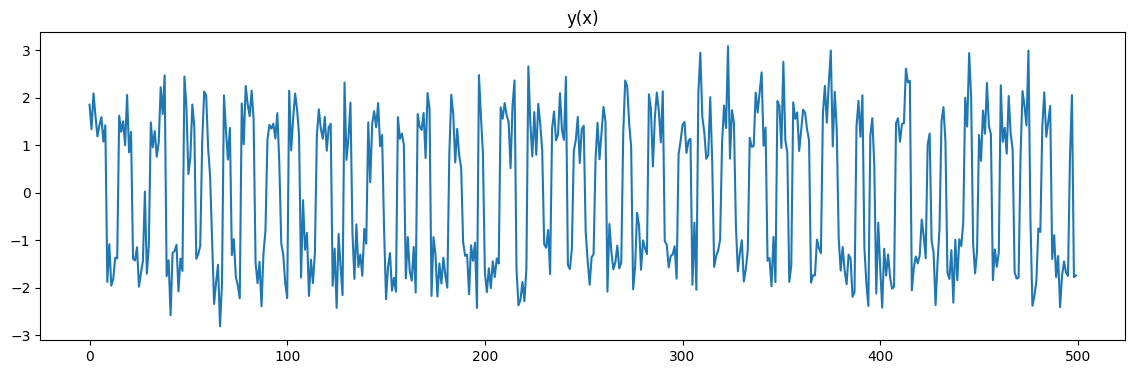

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la

dados_1 = np.loadtxt('dados_01.dat')
dados_2 = np.loadtxt('dados_02.dat')

x = dados_1[:, 0] # x do gráfico
y = dados_1[:,2] # dados para fazer a função de treinamento

plt.figure(figsize=(14,4))
plt.plot(x, y)
plt.title("y(x)")
plt.show()

 # Treinamento com y(x)

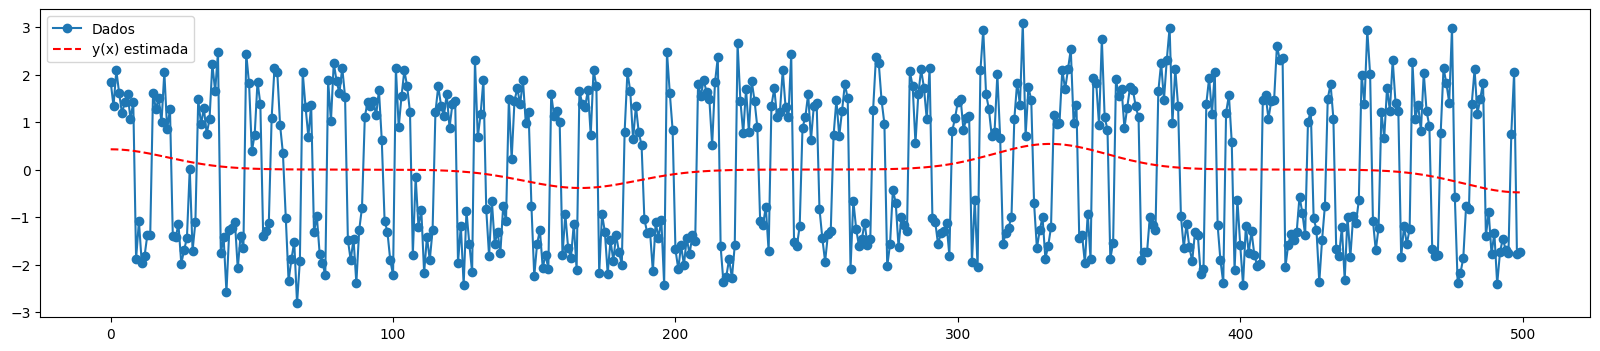

In [3]:
c = np.linspace(x[0], x[-1], 4) # centros

phi = np.zeros(shape=(len(x), len(c)))

sigma = 20

for i in range(len(x)):
    for j in range(len(c)):
        phi[i, j] = np.exp(-(1/(2*(sigma**2)))*(x[i] - c[j])**2)

w = la.pinv(phi)@y
y_est = phi @ w

plt.figure(figsize=(20,4))
plt.plot(x, y, 'o-', label="Dados")
plt.plot(x, y_est, '--r', label="y(x) estimada")
plt.legend()
plt.show()

* Qualidade e erro de treinamento

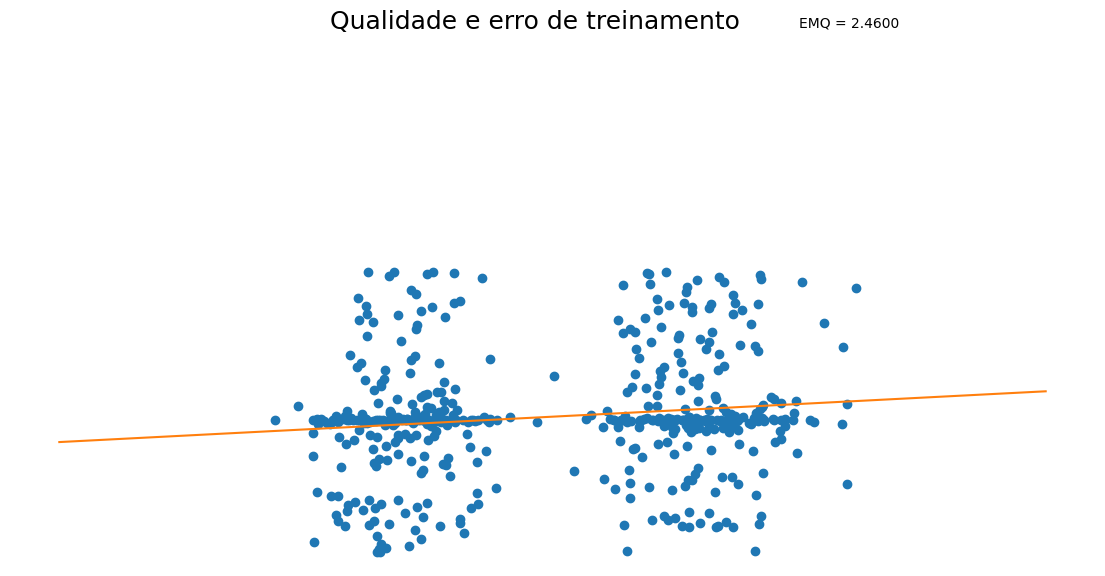

In [20]:
p = np.poly1d( np.polyfit(y, y_est, 1) )
t = np.linspace(-5, 5, 500)
#
EMQ = np.mean((y - y_est)**2)
#
plt.figure(figsize = (14,4))
plt.suptitle("Qualidade e erro de treinamento", fontsize=18, y=1.5)
plt.plot(y, y_est, 'o', t, p(t), '-')
plt.text(2.5, 1.43, 'EMQ = %.4f' %EMQ)
plt.axis('off')
plt.show()

# Etapa de teste com 'dados_02.dat'

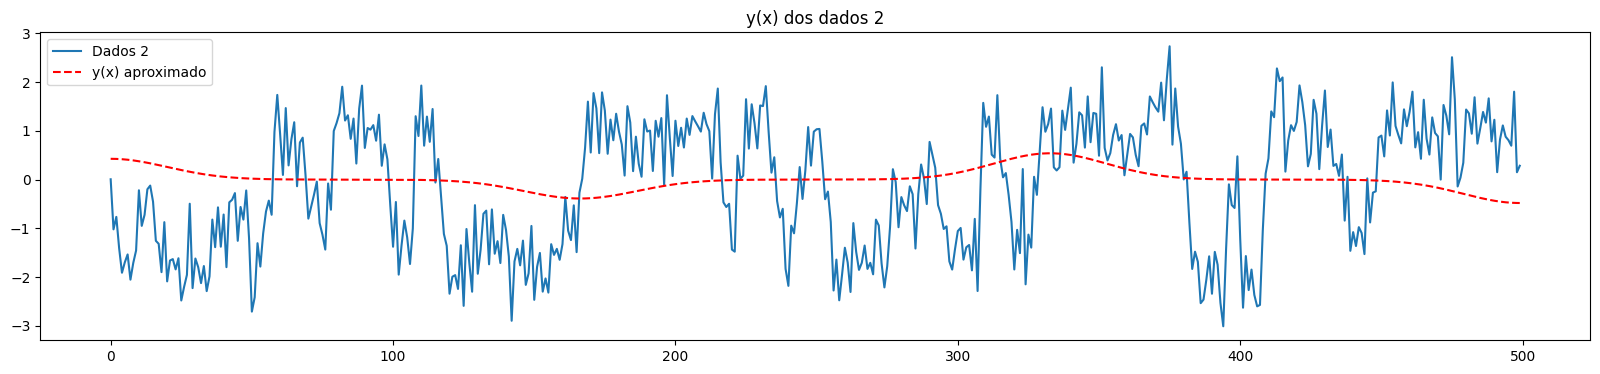

In [6]:
dados_2 = np.loadtxt('dados_02.dat')

x_test = dados_2[:, 0] # x do gráfico
y_test = dados_2[:,2] # dados para testar

phi_test = np.zeros(shape=(len(x_test), len(c)))

for i in range(len(x_test)):
    for j in range(len(c)):
        phi_test[i, j] = np.exp(-(1/(2*(sigma**2)))*(x_test[i] - c[j])**2)

y_est_test = phi_test @ w

plt.figure(figsize=(20,4))
plt.plot(x_test, y_test, label="Dados 2")
plt.plot(x_test, y_est_test, '--r', label="y(x) aproximado")
plt.legend()
plt.title("y(x) dos dados 2")
plt.show()

* Qualidade e erro de validação

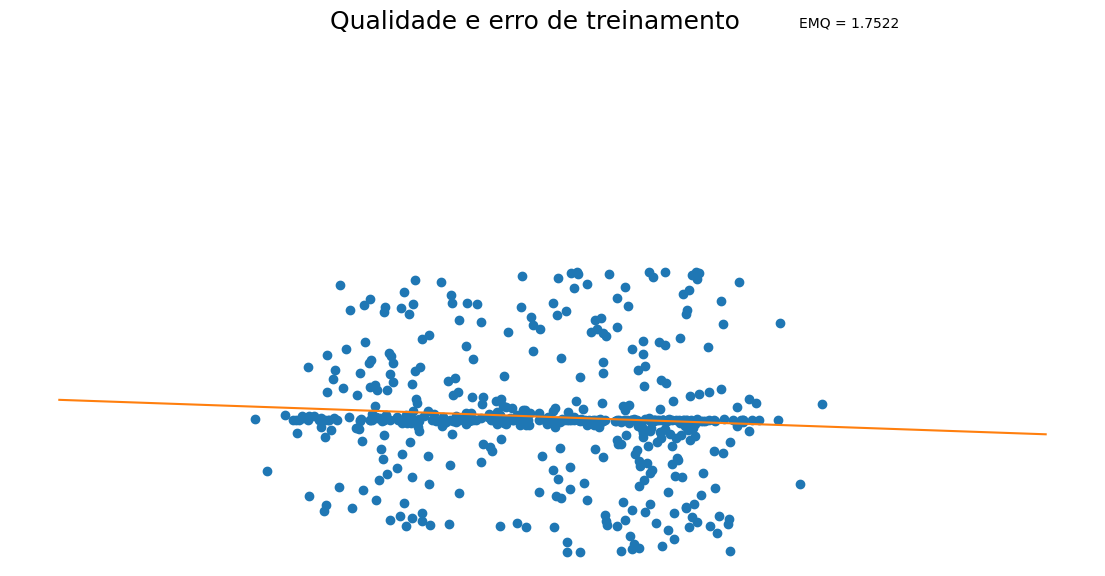

In [22]:
p = np.poly1d( np.polyfit(y_test, y_est_test, 1) )
t = np.linspace(-5, 5, 500)
#
EMQ = np.mean((y_test - y_est_test)**2)
#
plt.figure(figsize = (14,4))
plt.suptitle("Qualidade e erro de treinamento", fontsize=18, y=1.5)
plt.plot(y_test, y_est_test, 'o', t, p(t), '-')
plt.text(2.5, 1.43, 'EMQ = %.4f' %EMQ)
plt.axis('off')
plt.show()